#### COMP3602: Data Analysis and Visualization with Python, Spring 2024

# Project Part 4

Source URL of Dataset: [https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks)

**Group Members:**

- Abdulaziz Saud Al Jabri (134563)

- Mazin Humood Al Dhuhli (134362)


---

### Dataset Introduction:

Cybersecurity attack datasets hold the key to understanding cyber threats. They provide valuable information for training security models to detect and prevent attacks, revealing insights into evolving attacker tactics and enabling researchers to benchmark security tools. By analyzing these datasets, researchers can answer crucial questions like the most prevalent attack types, how attack methods shift over time, and how effective machine learning models are in real-time attack identification. Ultimately, this exploration provides researchers ways to develop more robust defenses and stay ahead of the ever-changing threat landscape.

* Purpose:
    - Train security models (e.g., malware detection).
    - Understand attack patterns and trends.
    - Benchmark security tools.

---
* **Research Questions**:

    1. What are the most prevalent attack types?

    2. What are the most prevelant times of the day do cyberattacks occur?
    
    3. Can machine learning models be developed to accurately identify and classify cyberattacks in real-time?

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score

In [2]:
data = pd.read_csv('cybersecurity_attacks.csv')

In [3]:
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


---
Show the number of rows/observations in the dataset

In [4]:
print("Number of observations:", data.shape[0])    

Number of observations: 40000


---
Show the number of missing values for each attribute

In [5]:
print(data.isnull().sum())

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


---
**Pre-Proccessing**

Clean the data by filling in missing values in the dataset

In [6]:
data = data.dropna()
print(data.isnull().sum())

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


---
**Visualization**

Plots to display frequency distribution of the attributes

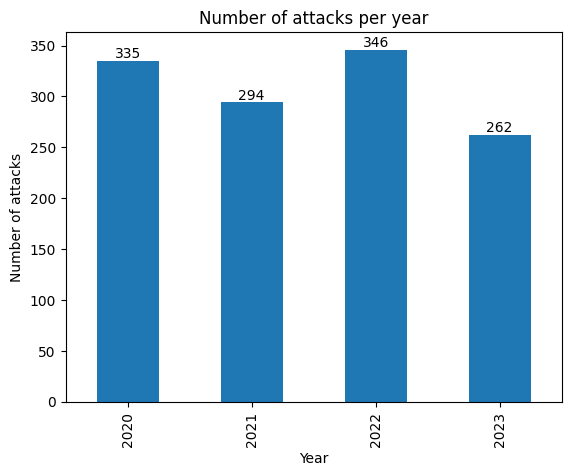

In [8]:
# Visualize the number of attacks per year using a bar chart
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year'] = data['Timestamp'].dt.year
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Number of attacks per year')
for index, value in enumerate(data['Year'].value_counts().sort_index()):
    plt.text(index, value+3, str(value), ha='center')
plt.show()

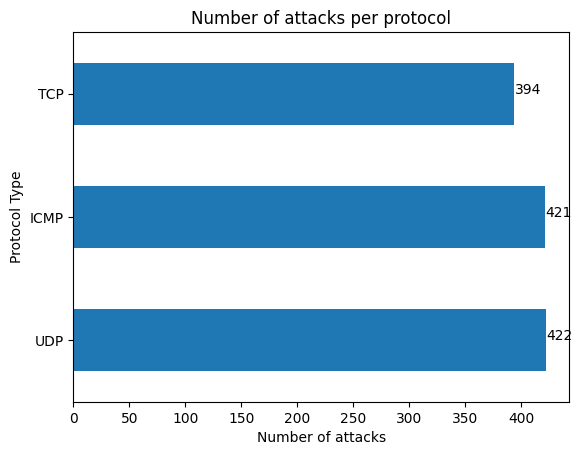

In [9]:
# Visualize the number of protocol types using a horizontal bar chart
data['Protocol'].value_counts().plot(kind='barh')
plt.xlabel('Number of attacks')
plt.ylabel('Protocol Type')
plt.title('Number of attacks per protocol')
for index, value in enumerate(data['Protocol'].value_counts()):
    plt.text(value+12, index, str(value), ha='center')
plt.show()

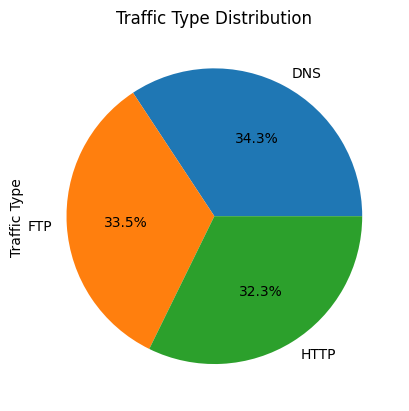

DNS     424
FTP     414
HTTP    399
Name: Traffic Type, dtype: int64


In [11]:
# Visualize the traffic type distribution using a pie chart
data['Traffic Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Traffic Type Distribution')
plt.show()
print(data['Traffic Type'].value_counts())

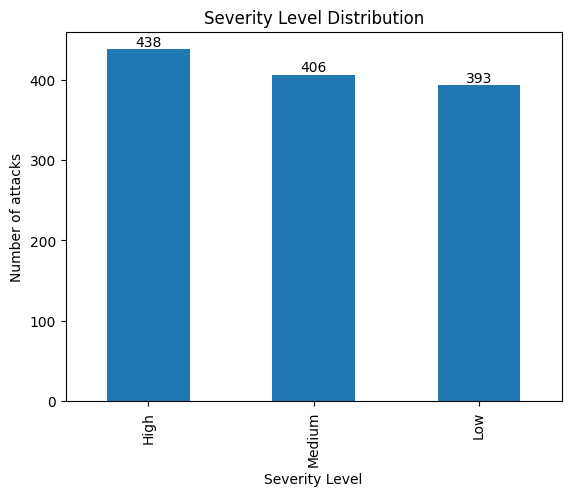

In [12]:
# Visualize the severity level of attacks using a bar chart
data['Severity Level'].value_counts().plot(kind='bar')
plt.xlabel('Severity Level')
plt.ylabel('Number of attacks')
plt.title('Severity Level Distribution')
for index, value in enumerate(data['Severity Level'].value_counts()):
    plt.text(index, value+4, str(value), ha='center')
plt.show()

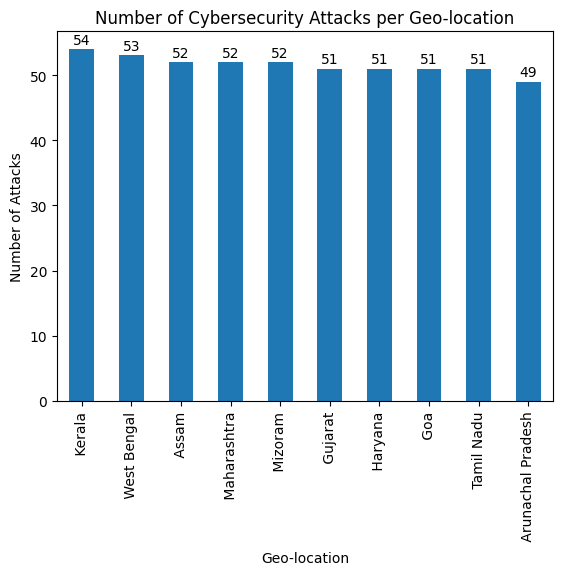

In [13]:
# Visualize the number of attacks per geo-location (state) using a bar chart
data['Geo-location Data'].str.split(',', expand=True)[1].value_counts().head(10).plot(kind='bar')
plt.title('Number of Cybersecurity Attacks per Geo-location')
plt.xlabel('Geo-location')
plt.ylabel('Number of Attacks')
for index, value in enumerate(data['Geo-location Data'].str.split(',', expand=True)[1].value_counts().head(10)):
    plt.text(index, value+0.8, str(value), ha='center')
plt.show()

---

**Answer to reseach question**: "What are the most prevalent attack types?"

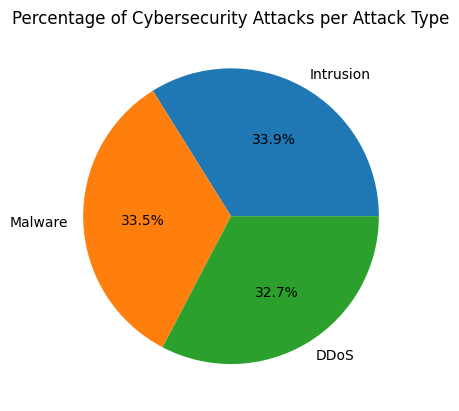

Intrusion    419
Malware      414
DDoS         404
Name: Attack Type, dtype: int64


In [14]:
# Visualize the percentage of attacks per attack type using a pie chart
data['Attack Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Cybersecurity Attacks per Attack Type')
plt.ylabel('')
plt.show()
print(data['Attack Type'].value_counts())

---

**Answer to reseach question**: "What are the most prevelant times of the day do cyberattacks occur?"

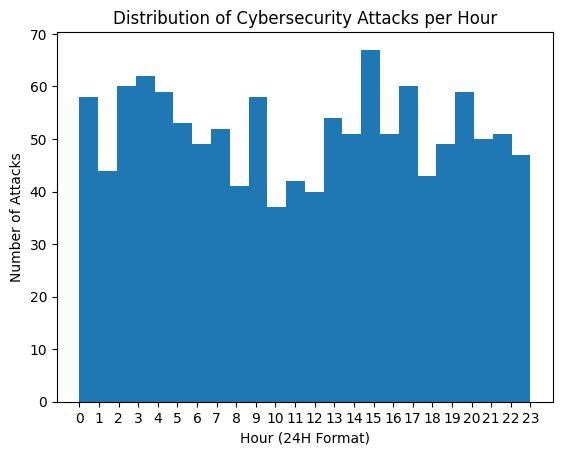

In [15]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'].dt.hour.plot(kind='hist', bins=24)
plt.title('Distribution of Cybersecurity Attacks per Hour')
plt.xlabel('Hour (24H Format)')
plt.ylabel('Number of Attacks')
plt.xticks(np.arange(0, 24, 1))
plt.show()

---

**Machine Learning** (Predictive Modeling and Evaluation)

In [16]:
# Encode from Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_clean_encoded = data.apply(lambda x: labelencoder.fit_transform(x) if x.dtype == 'object' else x)
data_clean_encoded.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Year
2,2022-11-13 08:23:25,1007,592,16811,53600,2,306,0,2,834,...,1,390,778,2,231,95,0,0,0,2022
7,2023-02-12 07:13:17,84,467,34489,20396,0,1022,1,0,70,...,0,1186,307,0,823,563,0,0,0,2023
46,2023-05-16 13:01:56,448,427,25022,6593,1,554,0,0,1207,...,0,158,895,0,55,1207,0,0,0,2023
97,2021-10-25 04:23:15,186,583,19199,27928,0,1178,1,2,322,...,0,436,704,2,1085,973,0,0,1,2021
105,2022-10-30 05:51:47,997,705,42864,48696,0,765,0,0,288,...,1,179,869,2,898,599,0,0,1,2022


Accuracy: 0.2967741935483871


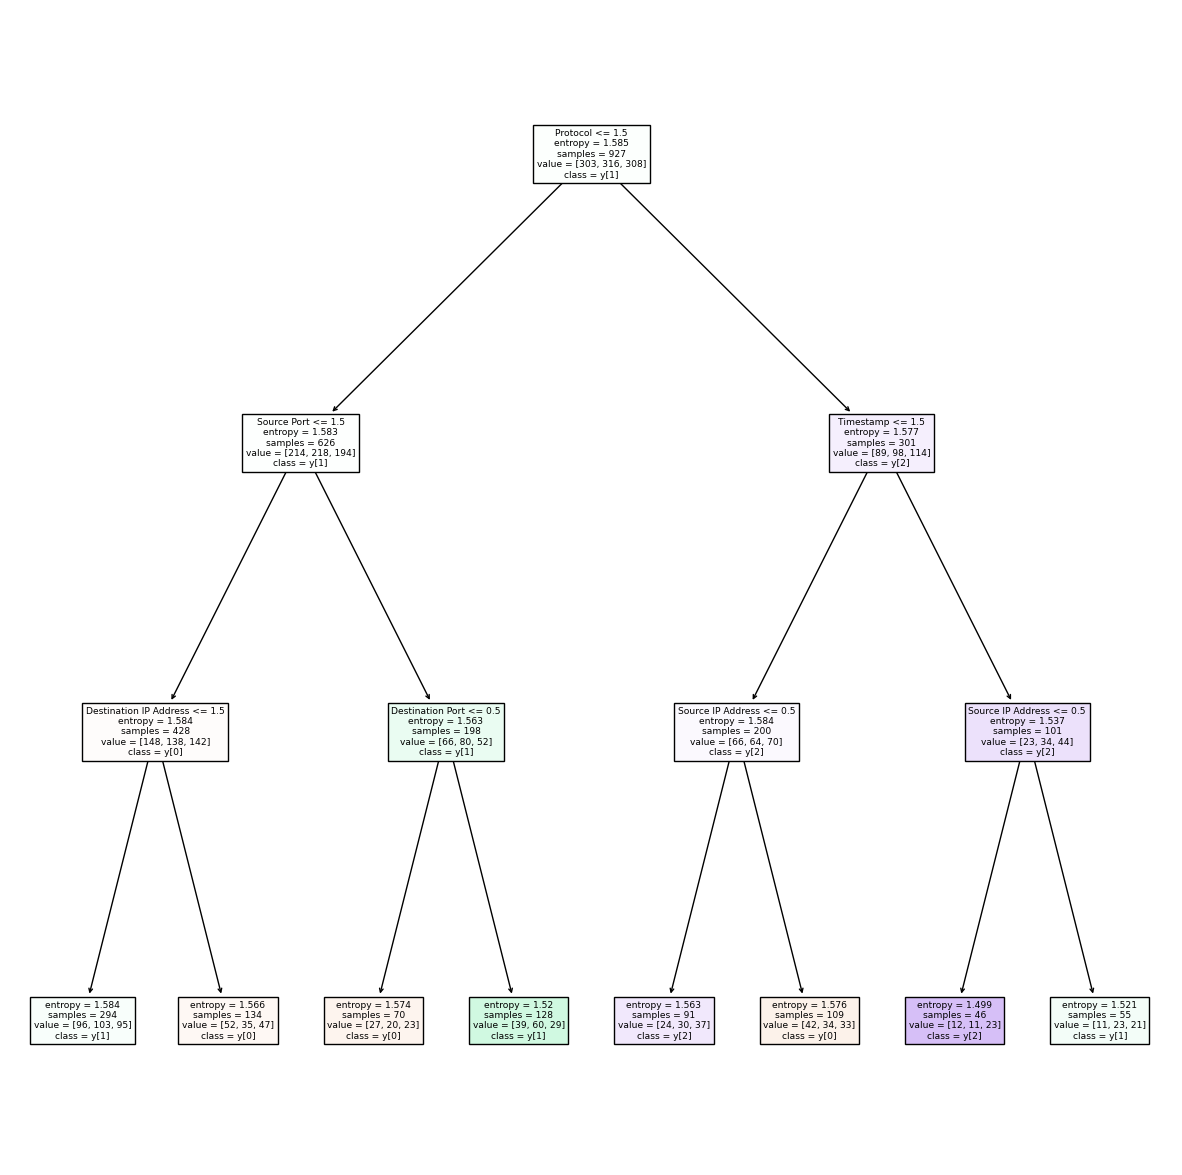

In [17]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)

x = data_clean_encoded[['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Severity Level', 'Network Segment', 'Log Source', 'Attack Signature']]

y = data_clean_encoded['Attack Type']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

classifier.fit(xtrain, ytrain)

ypred = classifier.predict(xtest)

print("Accuracy:", accuracy_score(ytest, ypred))

from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(classifier, filled=True, feature_names=data.columns[:-1], class_names=True)
plt.show()

In [18]:
x = data_clean_encoded[['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Severity Level', 'Network Segment', 'Log Source', 'Attack Signature']]

y = data_clean_encoded['Attack Type']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.25)

di ={}

classifier = DecisionTreeClassifier(criterion="entropy",max_depth=1)

classifier.fit(xtrain,ytrain)

p1 = classifier.predict(xtest)

ac1 = accuracy_score(p1,ytest)

print("The Acuracy for Max Depth = 1:",accuracy_score(p1,ytest))
di[ac1] = 1

classifier = DecisionTreeClassifier(criterion="entropy",max_depth=2)

classifier.fit(xtrain,ytrain)

p2 = classifier.predict(xtest)

ac2 = accuracy_score(p2,ytest)

print("The Acuracy for Max Depth = 2:",accuracy_score(p2,ytest))
di[ac2] = 2

classifier = DecisionTreeClassifier(criterion="entropy",max_depth=3)

classifier.fit(xtrain,ytrain)

p3 = classifier.predict(xtest)

ac3 = accuracy_score(p3,ytest)

print("The Acuracy for Max Depth = 3:",accuracy_score(p3,ytest))
di[ac3] = 3


besthp = max([ac1,ac2,ac3])
print("\nThe Best Hyper Parameter is Depth of:",di[besthp])
bestdepth = di[besthp]

The Acuracy for Max Depth = 1: 0.3580645161290323
The Acuracy for Max Depth = 2: 0.3
The Acuracy for Max Depth = 3: 0.3064516129032258

The Best Hyper Parameter is Depth of: 1
